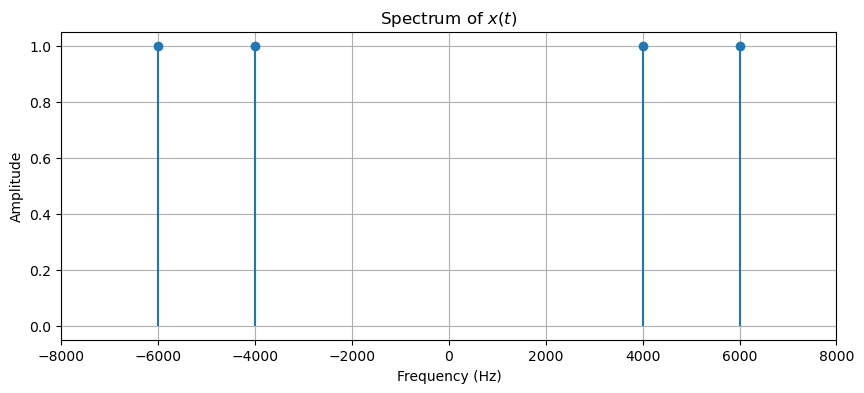

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure the directory for figures exists
os.makedirs('fig', exist_ok=True)

# Frequencies in Hz
f1 = 4000
f2 = 6000

# Frequency array
frequencies = np.array([-f2, -f1, f1, f2])
amplitudes = np.array([1, 1, 1, 1])  # Amplitude of delta functions

# Plotting
plt.figure(figsize=(10, 4))
plt.stem(frequencies, amplitudes, basefmt=" ")
plt.title('Spectrum of $x(t)$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(-8000, 8000)  # Set limits to show both frequencies clearly
plt.savefig('fig/ex1_a_plot.png')  # Save the figure to a file
plt.show()


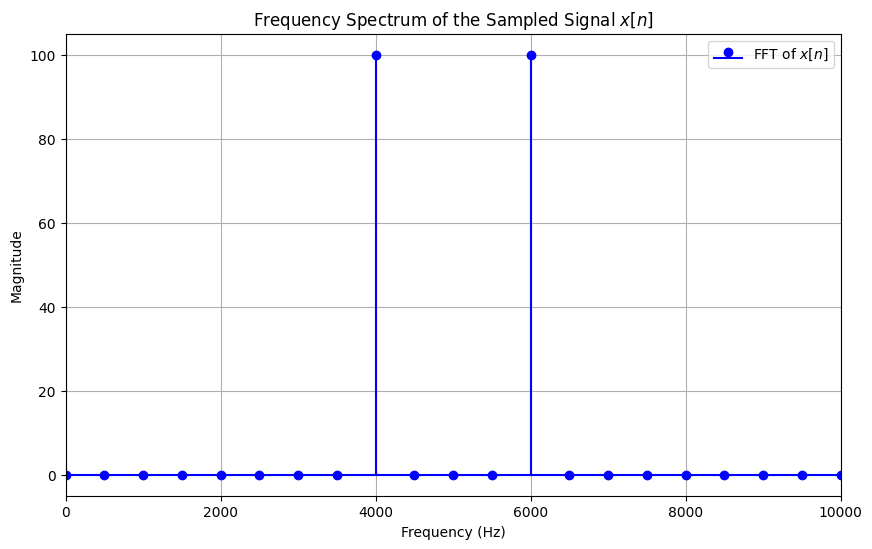

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the signal parameters
f1 = 4000  # Frequency of the first sine wave in Hz
f2 = 6000  # Frequency of the second sine wave in Hz
fs = 100000  # Sampling frequency in Hz

# Generate the sampled time array and the corresponding signal
ts = np.arange(0, 0.002, 1/fs)  # Sampled time array at intervals of Ts = 1/fs
x_n = np.sin(2 * np.pi * f1 * ts) + np.sin(2 * np.pi * f2 * ts)  # Sampled signal

# Compute the FFT and corresponding frequency bins
N = len(ts)  # Number of points in FFT
X_n = np.fft.fft(x_n)  # FFT of sampled signal
frequencies = np.fft.fftfreq(N, 1/fs)  # Frequency bins

# Plotting the FFT
plt.figure(figsize=(10, 6))
plt.stem(frequencies[:N // 2], np.abs(X_n[:N // 2]), linefmt='b-', markerfmt='bo', basefmt='b-', label='FFT of $x[n]$')
plt.title('Frequency Spectrum of the Sampled Signal $x[n]$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 10000)  # Limit the x-axis for clarity
plt.legend()
plt.grid(True)

# Save the figure to a file for inclusion in the LaTeX document
#plt.savefig('fig/ex1_c_fft_plot.png')
plt.show()


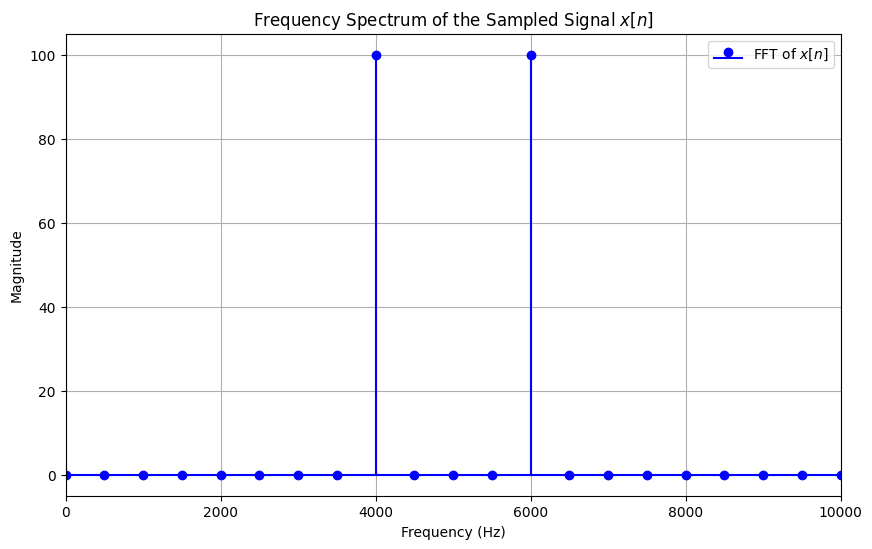

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the signal parameters
f1 = 4000  # Frequency of the first sine wave in Hz
f2 = 6000  # Frequency of the second sine wave in Hz
fs = 100000  # Sampling frequency in Hz

# Generate the sampled time array and the corresponding signal
ts = np.arange(0, 0.002, 1/fs)  # Sampled time array at intervals of Ts = 1/fs
x_n = np.sin(2 * np.pi * f1 * ts) + np.sin(2 * np.pi * f2 * ts)  # Sampled signal

# Compute the FFT and corresponding frequency bins
N = len(ts)  # Number of points in FFT
X_n = np.fft.fft(x_n)  # FFT of sampled signal
frequencies = np.fft.fftfreq(N, 1/fs)  # Frequency bins

# Plotting the FFT
plt.figure(figsize=(10, 6))
plt.stem(frequencies[:N // 2], np.abs(X_n[:N // 2]), linefmt='b-', markerfmt='bo', basefmt='b-', label='FFT of $x[n]$')
plt.title('Frequency Spectrum of the Sampled Signal $x[n]$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 10000)  # Limit the x-axis for clarity
plt.legend()
plt.grid(True)

# Save the figure to a file for inclusion in the LaTeX document
plt.savefig('fig/ex1_c_fft_plot.png')
plt.show()


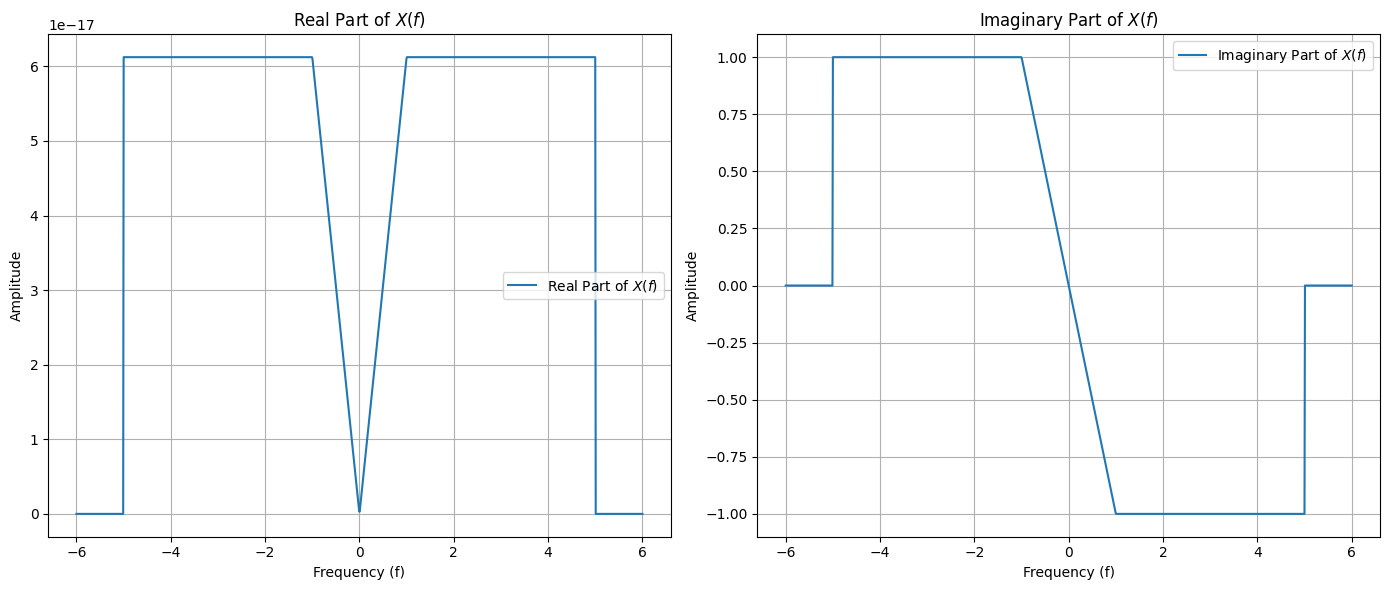

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the frequency range
f = np.linspace(-6, 6, 1200)
A = 1  # Amplitude, can be set to any desired value

# Define the magnitude |X(f)|
X_f_mag = np.where((f >= -5) & (f <= -1) | (f >= 1) & (f <= 5), A,
           np.where((f > -1) & (f < 0), -A*f,
           np.where((f >= 0) & (f < 1), A*f, 0)))

# Define the phase φ_x(f)
phi_x_f = np.where(f < 0, np.pi/2,
           np.where(f > 0, -np.pi/2, 0))

# Calculate Re{X(f)} and Im{X(f)}
X_f_real = X_f_mag * np.cos(phi_x_f)
X_f_imag = X_f_mag * np.sin(phi_x_f)

# Plotting
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(f, X_f_real, label='Real Part of $X(f)$')
plt.title('Real Part of $X(f)$')
plt.xlabel('Frequency (f)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(f, X_f_imag, label='Imaginary Part of $X(f)$')
plt.title('Imaginary Part of $X(f)$')
plt.xlabel('Frequency (f)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


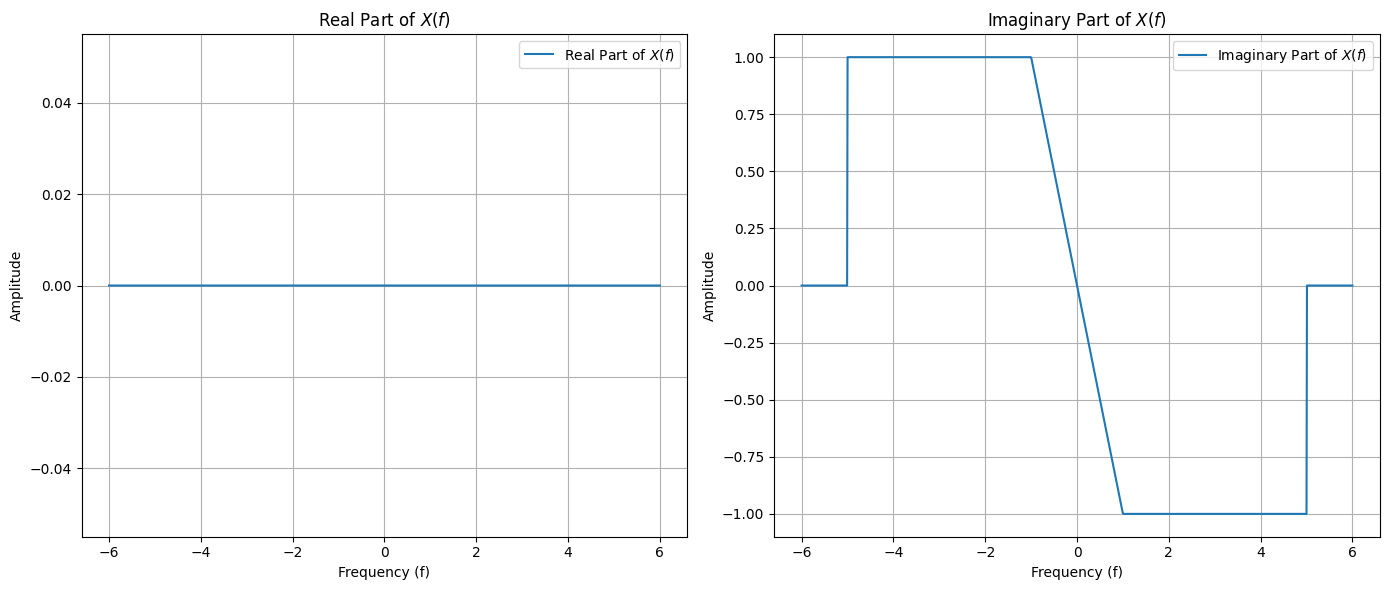

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the frequency range
f = np.linspace(-6, 6, 1200)
A = 1  # Amplitude, can be set to any desired value

# Define the magnitude and phase
X_f_mag = np.where((np.abs(f) >= 1) & (np.abs(f) <= 5), A,
           np.where((f >= -1) & (f < 0), -A * f,
           np.where((f >= 0) & (f < 1), A * f, 0)))
phi_x_f = np.where(f < 0, np.pi / 2,
           np.where(f > 0, -np.pi / 2, 0))

# Calculate Re{X(f)} and Im{X(f)}
X_f_real = X_f_mag * np.cos(phi_x_f)
X_f_imag = X_f_mag * np.sin(phi_x_f)

# Threshold values close to zero to be zero
epsilon = 1e-15  # Define a threshold for 'zero'
X_f_real[np.abs(X_f_real) < epsilon] = 0

# Plotting
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(f, X_f_real, label='Real Part of $X(f)$')
plt.title('Real Part of $X(f)$')
plt.xlabel('Frequency (f)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(f, X_f_imag, label='Imaginary Part of $X(f)$')
plt.title('Imaginary Part of $X(f)$')
plt.xlabel('Frequency (f)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('fig/ex2_task_a_spectrum_analysis.png')
plt.show()


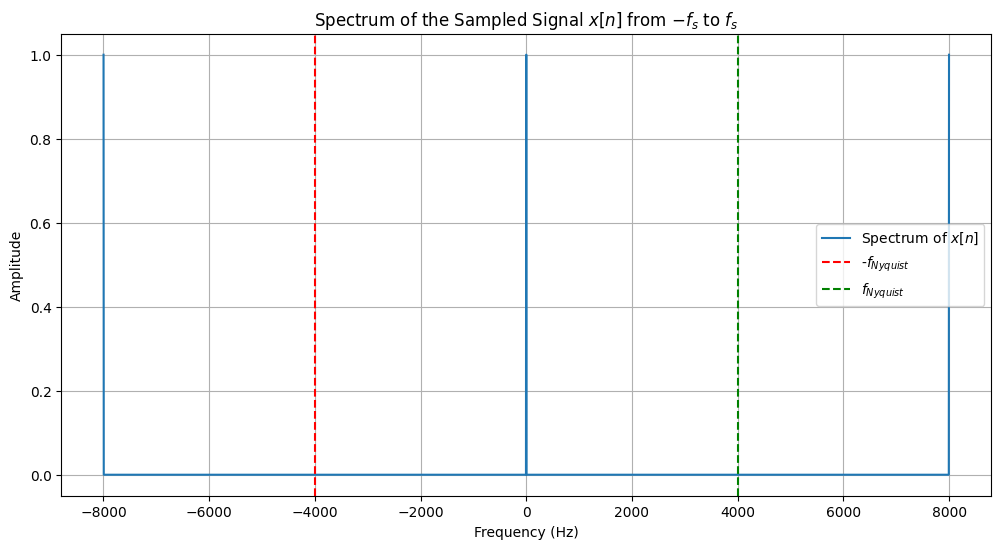

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fs = 8000  # Sampling frequency
f_nyquist = fs / 2
f_plot = np.linspace(-fs, fs, 4000)  # Frequency range for plotting

# Define the original continuous spectrum
def original_spectrum(f):
    # Initialize the spectrum to zero
    X_f = np.zeros_like(f)
    # Define the spectrum according to the piecewise function
    mask1 = (np.abs(f) >= 1) & (np.abs(f) <= 5)
    mask2 = (f > -1) & (f < 0)
    mask3 = (f >= 0) & (f < 1)
    X_f[mask1] = 1  # Constant amplitude in the specified ranges
    X_f[mask2] = -f[mask2]  # Linearly decreasing
    X_f[mask3] = f[mask3]  # Linearly increasing
    return X_f

# Generate the spectrum for a wide range to include multiple replications
f_wide = np.linspace(-3*fs, 3*fs, 12000)
X_f_wide = original_spectrum(f_wide)

# Replicate the spectrum at intervals of fs
X_f_sampled = np.zeros_like(f_wide)
for k in range(-3, 4):  # Covers a few periods on both sides
    X_f_sampled += np.roll(X_f_wide, k * len(X_f_wide) // 6)

# Trim the spectrum to the desired plotting range
X_f_sampled_trimmed = X_f_sampled[(f_wide >= -fs) & (f_wide <= fs)]
f_plot_trimmed = f_wide[(f_wide >= -fs) & (f_wide <= fs)]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(f_plot_trimmed, X_f_sampled_trimmed, label='Spectrum of $x[n]$')
plt.axvline(x=-f_nyquist, color='red', linestyle='--', label='-$f_{Nyquist}$')
plt.axvline(x=f_nyquist, color='green', linestyle='--', label='$f_{Nyquist}$')
plt.title('Spectrum of the Sampled Signal $x[n]$ from $-f_s$ to $f_s$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
